<a href="https://colab.research.google.com/github/PriyaP-9704/Machine-Leaning-Workouts/blob/main/ML_workout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### KNN model creation


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score,roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data = pd.read_csv('/content/health_data.csv')

In [ ]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
#Info
#Null
#Null Impute
#Corr
#Feature Selection
#Model

In [ ]:
3. #Null Impute

n = data.isnull().mean()*100
n.sort_values(ascending = False).index[0:7].tolist()

['glucose', 'education', 'BPMeds', 'totChol', 'cigsPerDay', 'BMI', 'heartRate']

In [ ]:
data["heartRate"].fillna(0,inplace= True)

In [ ]:
data["BMI"].fillna(data['BMI'].mean(),inplace= True)

In [ ]:
data["cigsPerDay"].fillna(data['cigsPerDay'].mean(),inplace= True)

In [ ]:
data["totChol"].fillna(data['totChol'].mean(),inplace= True)

In [ ]:
data["BPMeds"].value_counts()
data["BPMeds"].fillna(0,inplace= True)

In [ ]:
data["education"].value_counts()
data["education"].fillna(1.0,inplace= True)

In [ ]:
data["glucose"].fillna(data['glucose'].mean(),inplace= True)

In [ ]:
data.isnull().mean()*100

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

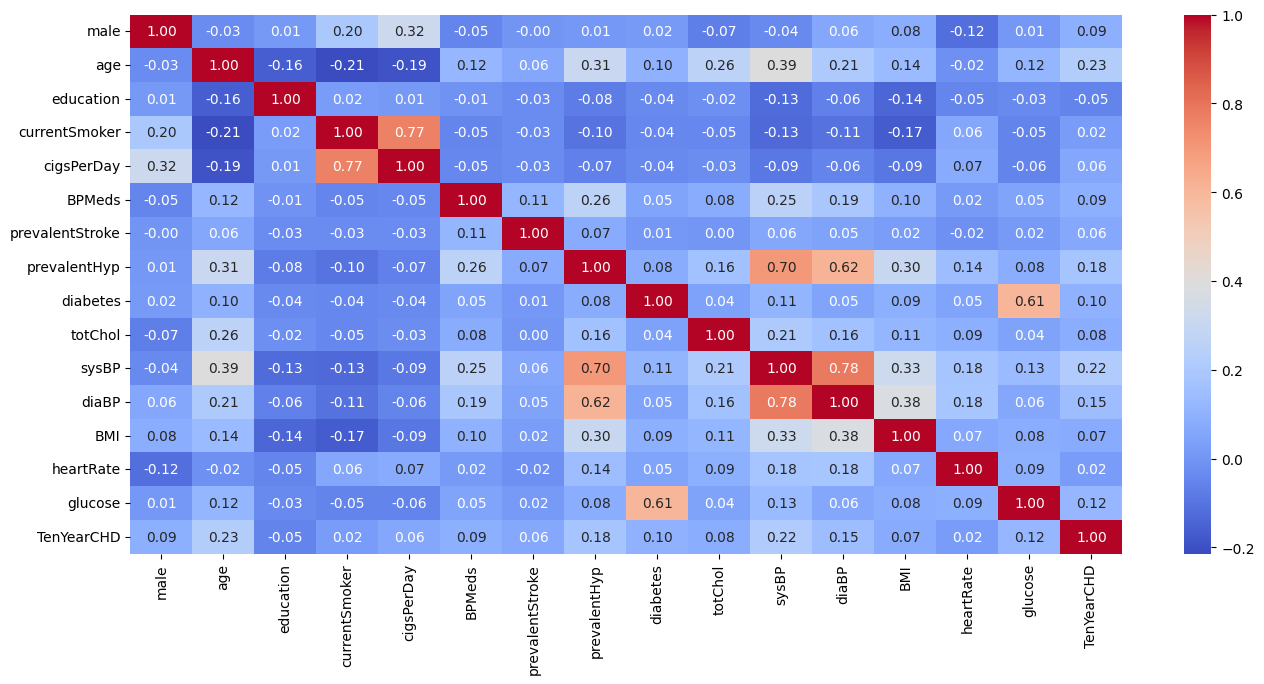

In [ ]:
plt.figure(figsize=(16,7))
sns.heatmap(data.corr(),fmt = '.2f',cmap="coolwarm", annot = True)
plt.show()

In [ ]:
data_1 = data.drop(["cigsPerDay","diaBP"],axis= 1)

In [ ]:
values = data_1.drop("TenYearCHD",axis = 1)
tar = data_1["TenYearCHD"]

In [ ]:
train_data, test_data,train_label,  test_label = train_test_split(values,tar, test_size= 0.2, random_state = 46)

In [ ]:
train_data.shape

(3390, 13)

In [ ]:
test_data.shape

(848, 13)

In [ ]:
# KNN Model creation

model = KNeighborsClassifier(n_neighbors= 5)

In [ ]:
model.fit(train_data,train_label)

KNeighborsClassifier()

In [ ]:
train_pre = model.predict(train_data)

In [ ]:
print("accuracy_score: ",accuracy_score(train_label, train_pre)*100)
print("precision_score: ",precision_score(train_label, train_pre)*100)
print("recall_score: ",recall_score(train_label, train_pre)*100)
print("f1_score: ",f1_score(train_label, train_pre)*100)

accuracy_score:  86.16519174041298
precision_score:  65.82278481012658
recall_score:  20.03853564547206
f1_score:  30.723781388478578


In [ ]:
test_pre = model.predict(test_data)

In [ ]:
print("accuracy_score: ",accuracy_score(test_label, test_pre)*100)
print("precision_score: ",precision_score(test_label, test_pre)*100)
print("recall_score: ",recall_score(test_label, test_pre)*100)
print("f1_score: ",f1_score(test_label, test_pre)*100)

accuracy_score:  83.60849056603774
precision_score:  31.57894736842105
recall_score:  9.6
f1_score:  14.723926380368098


In [ ]:
pd.Series(train_pre).value_counts()
confusion_matrix(train_label,train_pre)

array([[2817,   54],
       [ 415,  104]])

In [ ]:
pd.Series(test_pre).value_counts()
confusion_matrix(test_label,test_pre)

array([[697,  26],
       [113,  12]])

In [ ]:
#With Balance data - Over Sampling
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ro = RandomOverSampler(random_state= 46)

In [ ]:
resample_data, resample_tar = ro.fit_resample(values,tar)

In [ ]:
resample_data.head()
pd.Series(resample_tar).value_counts()

TenYearCHD
0    3594
1    3594
Name: count, dtype: int64

In [ ]:
# data split from over sampling data

val = resample_data
tar = resample_tar

In [ ]:
tr_data, tes_data, tr_lab, tes_lab = train_test_split(val,tar, test_size = 0.2, random_state = 43)

In [ ]:
model_os = KNeighborsClassifier(n_neighbors= 3)

In [ ]:
model_os.fit(tr_data,tr_lab)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
tr_pred = model_os.predict(tr_data)

In [ ]:
print("accuracy_score: ",accuracy_score(tr_lab, tr_pred)*100)
print("precision_score: ",precision_score(tr_lab, tr_pred)*100)
print("recall_score: ",recall_score(tr_lab, tr_pred)*100)
print("f1_score: ",f1_score(tr_lab, tr_pred)*100)

accuracy_score:  92.05217391304348
precision_score:  86.62381389654117
recall_score:  99.29824561403508
f1_score:  92.52901749223476


In [ ]:
tes_pred = model_os.predict(tes_data)

In [ ]:
print("accuracy_score: ",accuracy_score(tes_lab, tes_pred)*100)
print("precision_score: ",precision_score(tes_lab, tes_pred)*100)
print("recall_score: ",recall_score(tes_lab, tes_pred)*100)
print("f1_score: ",f1_score(tes_lab, tes_pred)*100)

accuracy_score:  84.7009735744089
precision_score:  79.04656319290466
recall_score:  95.83333333333334
f1_score:  86.63426488456865


In [ ]:
# Identifying best K value
for i in range(2,21):
  model_os = KNeighborsClassifier(n_neighbors= i)
  model_os.fit(tr_data,tr_lab)
  tr_pred = model_os.predict(tr_data)
  acc = accuracy_score(tr_lab, tr_pred)*100
  print("K= ",i,"accuracy_score: ",acc, "Loss: ",100-acc)

K=  2 accuracy_score:  99.58260869565217 Loss:  0.4173913043478308
K=  3 accuracy_score:  92.05217391304348 Loss:  7.947826086956525
K=  4 accuracy_score:  91.23478260869565 Loss:  8.765217391304347
K=  5 accuracy_score:  85.96521739130435 Loss:  14.03478260869565
K=  6 accuracy_score:  84.5913043478261 Loss:  15.408695652173904
K=  7 accuracy_score:  81.32173913043478 Loss:  18.67826086956522
K=  8 accuracy_score:  80.90434782608695 Loss:  19.095652173913052
K=  9 accuracy_score:  78.6086956521739 Loss:  21.391304347826093
K=  10 accuracy_score:  77.58260869565218 Loss:  22.417391304347817
K=  11 accuracy_score:  76.97391304347826 Loss:  23.026086956521738
K=  12 accuracy_score:  76.05217391304348 Loss:  23.947826086956525
K=  13 accuracy_score:  75.63478260869564 Loss:  24.365217391304355
K=  14 accuracy_score:  74.59130434782608 Loss:  25.40869565217392
K=  15 accuracy_score:  73.80869565217392 Loss:  26.191304347826076
K=  16 accuracy_score:  73.61739130434782 Loss:  26.38260869565

### Dicision Tree Classifier- Ensemble - Bagging Technique

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
data = pd.read_csv('/content/health_data.csv')
print("shape: ",data.shape)
print("==================")
print("Null counts",data.isnull().mean())
print("==================")
print(data.head())

shape:  (4238, 16)
Null counts male               0.000000
age                0.000000
education          0.024776
currentSmoker      0.000000
cigsPerDay         0.006843
BPMeds             0.012506
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011798
sysBP              0.000000
diaBP              0.000000
BMI                0.004483
heartRate          0.000236
glucose            0.091553
TenYearCHD         0.000000
dtype: float64
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totC

In [ ]:
data = data.dropna()

In [ ]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
data["TenYearCHD"].value_counts()

TenYearCHD
0    3099
1     557
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Features selection

feature = data.drop("TenYearCHD",axis= 1)
target = data["TenYearCHD"]

In [ ]:
# ModelCreation

ro = RandomOverSampler(random_state= 45)
resample_data, resample_target = ro.fit_resample(feature,target)

In [ ]:
resample_target.value_counts()

TenYearCHD
0    3099
1    3099
Name: count, dtype: int64

In [ ]:
# train and Test split
train_data, test_data, train_label, test_label =train_test_split(resample_data,resample_target,test_size= 0.2,random_state = 45)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(4958, 15)
(1240, 15)


In [ ]:
 # Dicision Tree model =

dt_model = DecisionTreeClassifier(random_state = 45)
dt_model.fit(train_data,train_label)

DecisionTreeClassifier(random_state=45)

In [ ]:
 # train prediction
train_pred = dt_model.predict(train_data)
accuracy_score(train_pred,train_label)*100
f1_score(train_pred,train_label)*100

100.0

In [ ]:
# test prediction

test_pred = dt_model.predict(test_data)
accuracy_score(test_pred,test_label)

0.9137096774193548

In [ ]:
# Feature Importance based on score
pd.DataFrame({
    "Columns": train_data.columns,
    "Score": dt_model.feature_importances_
}).sort_values("Score",ascending=False)


,Columns,Score
1,age,0.180182
9,totChol,0.136231
12,BMI,0.133425
10,sysBP,0.128704
14,glucose,0.110154
11,diaBP,0.102413
13,heartRate,0.102208
2,education,0.040327
4,cigsPerDay,0.039160
0,male,0.015377


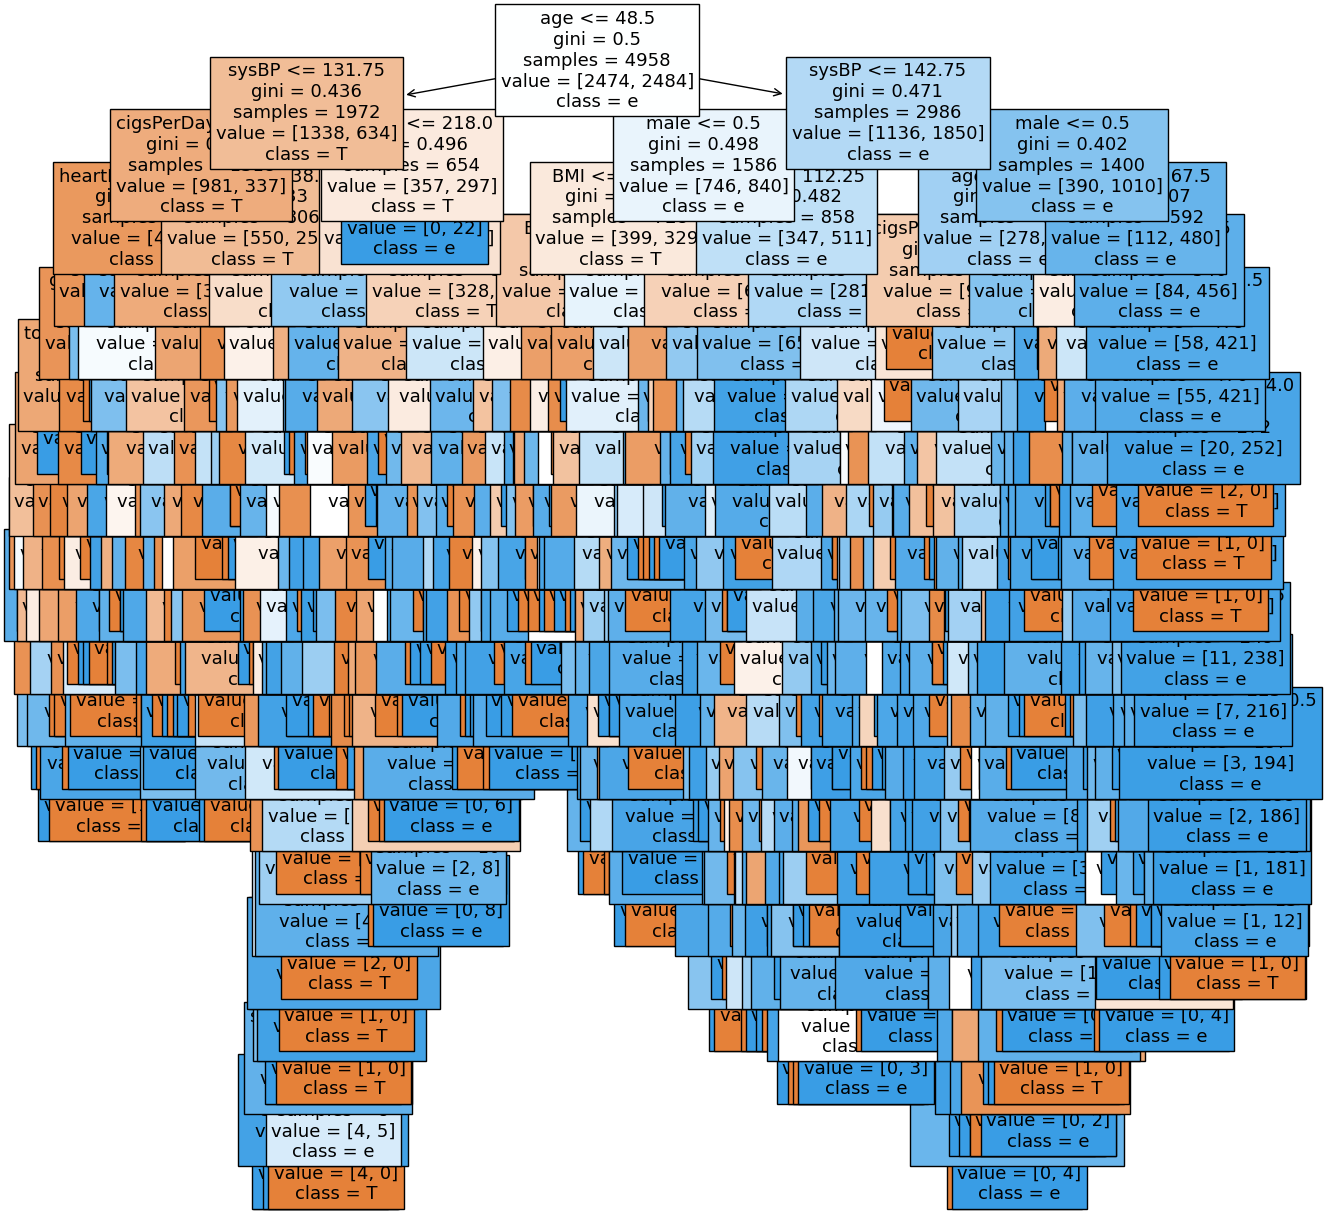

In [ ]:
# Tree view
plt.figure(figsize=(15,15))
plot_tree(dt_model,filled=True,feature_names= train_data.columns, class_names = "TenYearCHD",fontsize =13)
plt.show()

### Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators= 500, random_state =43,max_depth=10, criterion = "entropy")

In [ ]:
rf_model.fit(train_data,train_label)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500,
                       random_state=43)

In [ ]:
rf_test_pred=rf_model.predict(test_data)
print(accuracy_score(rf_test_pred, test_label)*100)
print(f1_score(rf_test_pred, test_label)*100)

86.45161290322581
87.05701078582435


###Decision Tree Regression

In [ ]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
feature = data.drop('heartRate', axis = 1)
target = data["heartRate"]

In [ ]:
train_data, test_data, train_label, test_label = train_test_split(feature,target,test_size = 0.2, random_state= 46)

In [ ]:
dr_model = DecisionTreeRegressor(random_state =45 )
dr_model.fit(train_data,train_label)

DecisionTreeRegressor(random_state=45)

In [ ]:
dr_pred = dr_model.predict(test_data)


0.05191256830601093


In [ ]:
mean_squared_error(test_label,dr_pred)

275.0887978142076

In [ ]:
mean_absolute_error(test_label,dr_pred)

13.32103825136612

In [ ]:
dr_train_pred = dr_model.predict(train_data)
print(mean_squared_error(train_label,dr_train_pred))
print(mean_absolute_error(train_label,dr_train_pred))

0.0
0.0


###Random Forest Regressor

In [ ]:
rr_model = RandomForestRegressor(n_estimators=500,random_state= 45, max_depth =10)
rr_model.fit(train_data,train_label)
rr_tes_pred = rr_model.predict(test_data)
print(mean_squared_error(test_label,rr_tes_pred))
print(mean_absolute_error(test_label,rr_tes_pred))
print(mean_absolute_percentage_error(test_label,rr_tes_pred))

143.37853996007328
9.306720114452514
0.12374854651515246


### Gradient Boosting Ensemble technique

In [ ]:
## Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [ ]:
## Reading CSV file

data = pd.read_csv('/content/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
## Encoding a single object column
le = LabelEncoder()
data["Sex"]= le.fit_transform(data["Sex"])

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
## Encoding all object column
for i in data.select_dtypes(include="object").columns:
  data[i] = le.fit_transform(data[i])

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
# Null value checking
data.isnull().mean()

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [ ]:
feature = data.drop("HeartDisease",axis=1)
target = data['HeartDisease']

In [ ]:
train_data,test_data,train_label,test_label = train_test_split(feature, target, test_size= 0.2,random_state = 46)

In [ ]:
target.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [ ]:
## Gradient boost classifier

model = GradientBoostingClassifier(n_estimators= 500, learning_rate= 0.0099, random_state = 45)
model.fit(train_data,train_label)
test_prediction= model.predict(test_data)
print(accuracy_score(test_prediction,test_label)*100)
print(precision_score(test_prediction,test_label)*100)
print(recall_score(test_prediction,test_label)*100)
print(f1_score(test_prediction,test_label)*100)

86.41304347826086
93.13725490196079
84.070796460177
88.3720930232558


In [ ]:
confusion_matrix(test_label,test_prediction)

array([[63, 19],
       [ 8, 94]])

### Extreme or Extended GB(XGB)

In [ ]:
pip install xgboost

In [ ]:
import xgboost

In [ ]:
xgb_model = xgboost.XGBClassifier(n_estimators= 500, learning_rate= 0.0099, random_state = 45)
xgb_model.fit(train_data,train_label)
test_prediction= xgb_model.predict(test_data)
print(accuracy_score(test_prediction,test_label)*100)
print(precision_score(test_prediction,test_label)*100)
print(recall_score(test_prediction,test_label)*100)
print(f1_score(test_prediction,test_label)*100)

83.69565217391305
90.19607843137256
82.14285714285714
85.98130841121495


### K- Means algorithm ---- Unsupervised model

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.cluster import KMeans

In [2]:
cls_data = pd.read_csv('/content/clst_data.csv')

In [3]:
cls_data.head()

,car-1,car-2
0,-7.338988,-7.729954
1,-7.740041,-7.264665
2,-1.686653,7.793442
3,4.422198,3.071947
4,-8.917752,-7.888196


In [4]:
# checking missing values
cls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   car-1   300 non-null    float64
 1   car-2   300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [6]:
cls_data.isnull().mean()

car-1    0.0
car-2    0.0
dtype: float64

In [10]:
# ELbow method for perfect k value find
inertia_value =[]
for k in range(1,21,1):
  test_model = KMeans(n_clusters = k, random_state = 45)
  test_model.fit(cls_data)
  iv =  test_model.inertia_
  inertia_value.append(iv)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [8]:
inertia_value

[20402.344442773276,
 5763.4647893924075,
 566.8595510915445,
 496.2115510490962,
 426.95420503983144,
 363.66627152324946,
 308.20016349251796,
 269.99012019979705,
 236.2652793426477,
 218.6453688168986,
 199.16759791207886,
 185.4710639041641,
 172.29710453127456,
 154.4579363322605,
 144.88007269437253,
 138.35713663382927,
 126.35052745632984,
 121.02931433283769,
 113.16100763369806]

In [11]:
# plot with inertia_value
fig = px.line(x= range(1,21),y = inertia_value, title= "ELbow Method")
fig.show()

In [12]:
# k = 3 or 4 will be best fit
k =3
# model initiate
model = KMeans(n_clusters = k,random_state=45)

In [13]:
#model data train
model.fit(cls_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=45)

In [14]:
clust = model.predict(cls_data)

In [15]:
data = cls_data.copy()

In [16]:
data["cluster"]= clust
data.head()

,car-1,car-2,cluster
0,-7.338988,-7.729954,1
1,-7.740041,-7.264665,1
2,-1.686653,7.793442,0
3,4.422198,3.071947,2
4,-8.917752,-7.888196,1


In [19]:
# visualize the clusters

fig = px.scatter(data, x = "car-1",y = "car-2", color = "cluster",hover_data= ["cluster"],
                 title = "car sensor dat")
fig.show()

In [3]:
## try k means for health care data

data = pd.read_csv('/content/health_data.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [8]:
in_list = []

for k in range(1,21,1):
  m1 = KMeans(n_clusters = k,random_state = 45)
  m1.fit(data)
  in_list.append(m1.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [9]:
in_list

[12884118.992641248,
 8365287.809092011,
 7076906.028887061,
 5937837.10704522,
 5208557.960690137,
 4726054.866666195,
 4412856.770162877,
 4157844.141013777,
 3988339.0969770756,
 3824388.135345746,
 3679276.9857584257,
 3544462.75648291,
 3432362.461531583,
 3332774.8764252774,
 3235141.143689929,
 3164208.575153566,
 3083472.3062384333,
 3022002.1517566512,
 2968821.6482996903,
 2917361.250306586]

In [10]:
fig = px.line(x = range(1,21),y = in_list, title = "Elbow Health care")
fig.show()

In [11]:
# k = 3
data1 = data.copy()
model = KMeans(n_clusters = 3, random_state = 45)
model.fit(data)
data1["Cluster"]= model.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [14]:
data1.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Cluster
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,2
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,2
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,2
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1


In [13]:
data1["Cluster"].value_counts()

Cluster
2    1649
0    1385
1     622
Name: count, dtype: int64

In [15]:
# 2 dimentional plot
fig = px.scatter(data1,x = "age",y = "heartRate",hover_data = ["totChol","BMI","cigsPerDay"],color = "Cluster",
                 title = "Healthcare")
fig.show()

In [17]:
# 3 dimentional plot
fig = px.scatter_3d(data1,x = "age",y = "heartRate",z = "BMI",hover_data = ["totChol","BMI","cigsPerDay"],color = "Cluster",
                 title = "Healthcare")
fig.show()


In [24]:
# 3 dim using PCA

from sklearn.decomposition import PCA
pca = PCA(n_components= 3)
comp = pca.fit_transform(data)

In [25]:
data1["comp1"] = comp[:,0]
data1["comp2"] = comp[:,1]
data1["comp3"] = comp[:,2]

In [26]:
data1.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Cluster,comp1,comp2,comp3
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,-46.695560,-16.080513,13.951208
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,2,11.264596,-11.430099,4.269255
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,2,6.218631,-14.392465,-2.843393
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,2,-6.969791,29.909759,-1.892625
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1,46.988326,-6.723096,8.256306


In [27]:
# 3 dimentional plot
fig = px.scatter_3d(data1,x = "comp1",y = "comp2",z = "comp3",hover_data = ["totChol","BMI","cigsPerDay"],color = "Cluster",
                 title = "Healthcare")
fig.show()

### Market Basket Analysis

In [1]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

In [5]:
data = pd.read_csv('/content/market_data.csv')

In [6]:
data.head()

,RepName,Day of Created_x,Customer Type,CustomerId,Customer Name,Address 1_x,Area Name,City Name,District_x,StateName_x,MobileNumber_x,Latlng_x,GST No_x,DealerId,RepName_x,Day of Created Date,City Name_x,Area Name_x,Dealer Name_x,Category Name_x,Sub-Category_x,Brand Name_x,Dealer type,Rank,Sourcing Partner,SourcingPartnerType,Credit Status_x,RepName_y,Day of Created_y,Dealer Name_y,Address 1_y,Area Name_y,City Name_y,District_y,StateName_y,MobileNumber_y,Latlng_y,Lot Size,Customer Rating,Credit Rating,GST No_y,SiteId,Rep. Name,Day of Created (sites),Site Name_x,Address1 (sites),Area/Town,CityName,District Name_x,Pin Code,Lat.Lng.,MobileNo.,Initial Construction Stage,Rep Name,Day of Created (sitebrandmixlines),Site Name_y,District Name_y,Construction Stage,Category Name_y,Sub-Category_y,Brand Name_y,Source Partner Name,Credit Status_y
0,AKASH,11 October 2023,Mason,12082,Saravanan,"30 Sadhukaramadam 1st Street Banavaram, Kosapet",KOSAPET (VELLORE),VELLORE,VELLORE,TAMIL NADU,90421 31569,"12.911805308071079,79.14168091722266 - 37",NaN,11817,VENKATESAN,6 October 2023,VELLORE,VELLORE FORT,"ANA Steel Traders,Vellore",STEEL,TMT BARS,ARS TMT\n,Authorized Dealer,3,NaN,Factory,Credit,VENKATESAN,6 October 2023,"ANA Steel Traders,Vellore","No 113 , Near Railway Cross , Opp to Silambu T...",VELLORE FORT,VELLORE,VELLORE,TAMIL NADU,9443075555,"13.094464,80.2863003 - 14",A,A,5 Star,NaN,850,AKASH,11 October 2023,30 Sadhukaramadam 1st Street,"Sadhukaramadam 1st Street Banavaram, Kosapet",Kosapet (Vellore),Vellore,VELLORE,632001,"12.912354536062995,79.14173353695614 - 4",90421 31569,Finishing,akash,11 October 2023,30 Sadhukaramadam 1st Street,VELLORE,Finishing,CEMENT,PPC,PRIYA CEMENT,NaN,NaN
1,AKASH,11 October 2023,Mason,12082,Saravanan,"30 Sadhukaramadam 1st Street Banavaram, Kosapet",KOSAPET (VELLORE),VELLORE,VELLORE,TAMIL NADU,90421 31569,"12.911805308071079,79.14168091722266 - 37",NaN,11817,VENKATESAN,6 October 2023,VELLORE,VELLORE FORT,"ANA Steel Traders,Vellore",STEEL,TMT BARS,ARS TMT\n,Authorized Dealer,3,NaN,Factory,Credit,VENKATESAN,6 October 2023,"ANA Steel Traders,Vellore","No 113 , Near Railway Cross , Opp to Silambu T...",VELLORE FORT,VELLORE,VELLORE,TAMIL NADU,9443075555,"13.094464,80.2863003 - 14",A,A,5 Star,NaN,850,AKASH,11 October 2023,30 Sadhukaramadam 1st Street,"Sadhukaramadam 1st Street Banavaram, Kosapet",Kosapet (Vellore),Vellore,VELLORE,632001,"12.912354536062995,79.14173353695614 - 4",90421 31569,Finishing,akash,11 October 2023,30 Sadhukaramadam 1st Street,VELLORE,Finishing,ELECTRICALS,ELECTRICAL CONDUITS,FINOLEX,NaN,NaN
2,AKASH,11 October 2023,Mason,12082,Saravanan,"30 Sadhukaramadam 1st Street Banavaram, Kosapet",KOSAPET (VELLORE),VELLORE,VELLORE,TAMIL NADU,90421 31569,"12.911805308071079,79.14168091722266 - 37",NaN,11817,VENKATESAN,6 October 2023,VELLORE,VELLORE FORT,"ANA Steel Traders,Vellore",STEEL,TMT BARS,ARS TMT\n,Authorized Dealer,3,NaN,Factory,Credit,VENKATESAN,6 October 2023,"ANA Steel Traders,Vellore","No 113 , Near Railway Cross , Opp to Silambu T...",VELLORE FORT,VELLORE,VELLORE,TAMIL NADU,9443075555,"13.094464,80.2863003 - 14",A,A,5 Star,NaN,850,AKASH,11 October 2023,30 Sadhukaramadam 1st Street,"Sadhukaramadam 1st Street Banavaram, Kosapet",Kosapet (Vellore),Vellore,VELLORE,632001,"12.912354536062995,79.14173353695614 - 4",90421 31569,Finishing,akash,11 October 2023,30 Sadhukaramadam 1st Street,VELLORE,Finishing,ELECTRICALS,MCB,POLYCAB,NaN,NaN
3,AKASH,11 October 2023,Mason,12082,Saravanan,"30 Sadhukaramadam 1st Street Banavaram, Kosapet",KOSAPET (VELLORE),VELLORE,VELLORE,TAMIL NADU,90421 31569,"12.911805308071079,79.14168091722266 - 37",NaN,11817,VENKATESAN,6 October 2023,VELLORE,VELLORE FORT,"ANA Steel Traders,Vellore",STEEL,TMT BARS,ARS TMT\n,Authorized Dealer,3,NaN,Factory,Credit,VENKATESAN,6 October 2023,"ANA Steel Traders,Vellore","No 113 , Near Railway Cross , Opp to Silambu T...",VELLORE FORT,VELLORE,VELLORE,TAMIL NADU,9443075555,"13.094464,80.2863003 - 14",A,A,5 Star,NaN,850,AKASH,11 October 2023,3

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14105 entries, 0 to 14104
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   RepName                             14105 non-null  object 
 1   Day of Created_x                    14105 non-null  object 
 2   Customer Type                       14105 non-null  object 
 3   CustomerId                          14105 non-null  int64  
 4   Customer Name                       14105 non-null  object 
 5   Address 1_x                         14105 non-null  object 
 6   Area Name                           14089 non-null  object 
 7   City Name                           14057 non-null  object 
 8   District_x                          14105 non-null  object 
 9   StateName_x                         13993 non-null  object 
 10  MobileNumber_x                      14105 non-null  object 
 11  Latlng_x                            13799

In [9]:
data.shape

(14105, 63)

In [11]:
data[["Day of Created_x","Day of Created Date","Day of Created_y","Day of Created (sites)","Day of Created (sitebrandmixlines)"]]

,Day of Created_x,Day of Created Date,Day of Created_y,Day of Created (sites),Day of Created (sitebrandmixlines)
0,11 October 2023,6 October 2023,6 October 2023,11 October 2023,11 October 2023
1,11 October 2023,6 October 2023,6 October 2023,11 October 2023,11 October 2023
2,11 October 2023,6 October 2023,6 October 2023,11 October 2023,11 October 2023
3,11 October 2023,6 October 2023,6 October 2023,11 October 2023,11 October 2023
4,11 October 2023,6 October 2023,6 October 2023,11 October 2023,11 October 2023
...,...,...,...,...,...
14100,19 October 2023,19 October 2023,19 October 2023,19 October 2023,19 October 2023
14101,19 October 2023,19 October 2023,19 October 2023,19 October 2023,19 October 2023
14102,19 October 2023,19 October 2023,19 October 2023,19 October 2023,19 October 2023
14103,19 October 2023,19 October 2023,19 October 2023,19 October 2023,19 October 2023


In [12]:
data.columns

Index(['RepName', 'Day of Created_x', 'Customer Type', 'CustomerId',
       'Customer Name', 'Address 1_x', 'Area Name', 'City Name', 'District_x',
       'StateName_x', 'MobileNumber_x', 'Latlng_x', 'GST No_x', 'DealerId',
       'RepName_x', 'Day of Created Date', 'City Name_x', 'Area Name_x',
       'Dealer Name_x', 'Category Name_x', 'Sub-Category_x', 'Brand Name_x',
       'Dealer type', 'Rank', 'Sourcing Partner', 'SourcingPartnerType',
       'Credit Status_x', 'RepName_y', 'Day of Created_y', 'Dealer Name_y',
       'Address 1_y', 'Area Name_y', 'City Name_y', 'District_y',
       'StateName_y', 'MobileNumber_y', 'Latlng_y', 'Lot Size',
       'Customer Rating', 'Credit Rating', 'GST No_y', 'SiteId', 'Rep. Name',
       'Day of Created (sites)', 'Site Name_x', 'Address1 (sites)',
       'Area/Town', 'CityName', 'District Name_x', 'Pin Code', 'Lat.Lng.',
       'MobileNo.', 'Initial Construction Stage', 'Rep Name',
       'Day of Created (sitebrandmixlines)', 'Site Name_y', 'Dis

In [16]:
df_1 = data[["CustomerId","Day of Created Date","Sub-Category_x"]]

In [17]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14105 entries, 0 to 14104
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerId           14105 non-null  int64 
 1   Day of Created Date  14105 non-null  object
 2   Sub-Category_x       14105 non-null  object
dtypes: int64(1), object(2)
memory usage: 330.7+ KB


In [ ]:
df_1.columns = ["CustomerId","Date","Products"]
df_1

In [ ]:
df_1["Date"] = pd.to_datetime(df_1["Date"])

In [15]:
data["CustomerId"].value_counts(ascending=True)

CustomerId
11956      4
12155      4
12480      6
12307      6
11999      8
        ... 
12097    473
11928    481
12223    528
12519    645
12031    736
Name: count, Length: 246, dtype: int64